In [1]:
!pip install statannotations

In [2]:
import pandas as pd
import numpy as np 
import math 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
from statannotations.Annotator import Annotator

import utils, plot_utils, stats_utils

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

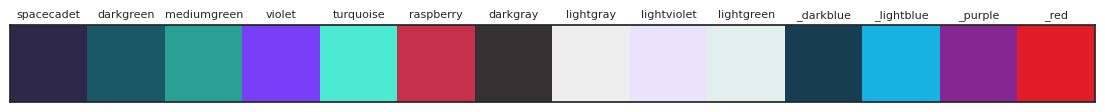

In [4]:
sns.set(style='white',font_scale=1.3)
pa_colors = pd.Series({'spacecadet': '#2D2849',
 'darkgreen': '#195866',
 'mediumgreen': '#2AA095',
 'violet': '#793EF8',
 'turquoise': '#4CEAD3',
 'raspberry': '#C5304B',
 'darkgray': '#333132',
 'lightgray': '#EEEEEE',
 'lightviolet': '#EBE2FE',
 'lightgreen': '#E1EFED',
 '_darkblue': '#173D52',
 '_lightblue': '#16B2E1',
 '_purple': '#852693',
 '_red': '#E11C29'})
sns.palplot(pa_colors)
ax = plt.gca()
for i, name in enumerate(pa_colors.index):
    ax.text(i, -0.6, name, fontsize=8, ha='center')  
plt.show()

In [38]:
colormap_tgfbeta = {r'TGFb-CAF high': pa_colors['turquoise'], 
                    'TGFb-CAF low': pa_colors['violet']}

In [92]:
#Get slideId:class mapping

mil_df = pd.read_csv('data/brca.csv')

mil_df.set_index('slideID', inplace=True)
mil_df.drop(columns=['Unnamed: 0'], inplace=True)

mil_df = mil_df[['median_score', 'model_prediction', 'Class', 'train_set', 'val_set', 'test_set']]
mil_df.rename(columns={'tgfb_caf_pos':'Class'}, inplace=True)

low_df = mil_df[mil_df['model_prediction']==0]
high_df = mil_df[mil_df['model_prediction']==1]

low_df = low_df[['model_prediction', 'Class']]
high_df = high_df[['model_prediction', 'Class']]

mil_df

,median_score,model_prediction,Class,train_set,val_set,test_set
slideID,,,,,,
26524,0.618730,0,False,True,False,False
75662,0.421335,0,False,True,False,False
75663,0.591193,0,False,True,False,False
80086,0.577158,0,False,False,False,True
80092,0.701753,1,True,True,False,False
...,...,...,...,...,...,...
91896,0.736060,1,True,True,False,False
91897,0.613036,0,True,False,False,True
91901,0.591882,0,False,False,True,False


In [93]:
#results = mil_df[mil_df['test_set']]
#import numpy as np
#from numpy import argmax
#from sklearn import metrics 
#y = results.Class
#pred = results.median_score
##pred = results.weighted_majority_score
#fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
#roc_auc=metrics.auc(fpr, tpr)
#import matplotlib
#from matplotlib import rcParams
#
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 14}
#
#matplotlib.rc('font', **font)
#
#rcParams['figure.figsize'] = 12,8
#plt.style.use('seaborn-whitegrid')
#plt.figure()
#lw = 2
#plt.plot(
#    fpr,
#    tpr,
#    color="darkorange",
#    lw=lw,
#    label="ROC curve (area = %0.2f)" % roc_auc,
#)
#plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC curve - Validation")
#plt.legend(loc="lower right")
#plt.savefig('AUROC_Test')
#
#plt.show()
#

In [94]:
feature_df = pd.read_csv('data/brca_esi_stroma_hifs.csv').set_index('H & E_ID')
hifs = feature_df.join(results)
hifs

,AREA PROP [[CANCER STROMA] OVER [TISSUE]]_H & E,AREA PROP [[CANCER STROMA] OVER [TUMOR]]_H & E,AREA PROP [[CANCER] OVER [TISSUE]]_H & E,AREA PROP [[CANCER] OVER [TUMOR]]_H & E,AREA PROP [[DENSELY INFLAMED STROMA] OVER [CANCER STROMA]]_H & E,AREA PROP [[ELASTOSIS] OVER [CANCER STROMA]]_H & E,AREA PROP [[ESI_0120_CANCER] OVER [TISSUE]]_H & E,AREA PROP [[ESI_0120_CANCER] OVER [TUMOR]]_H & E,AREA PROP [[ESI_0120_STROMA] OVER [TISSUE]]_H & E,AREA PROP [[ESI_0120_STROMA] OVER [TUMOR]]_H & E,...,COUNT PROP [[FIBROBLAST CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,COUNT PROP [[LYMPHOCYTE CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,COUNT PROP [[MACROPHAGE CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,COUNT PROP [[PLASMA CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,median_score,model_prediction,Class,train_set,val_set,test_set
H & E_ID,,,,,,,,,,,,,,,,,,,,,
80130,0.734209,0.744892,0.251449,0.255108,0.024753,0.091758,0.246738,0.250328,0.651939,0.661425,...,0.887123,0.051945,0.001315,0.004712,0.706197,1,True,False,False,True
80284,0.672565,0.685223,0.308962,0.314777,0.166188,0.098076,0.305314,0.311061,0.617488,0.629110,...,0.744781,0.070034,0.000000,0.001347,0.716684,1,True,False,False,True
80394,0.629105,0.651587,0.336392,0.348413,0.096192,0.020931,0.326445,0.338111,0.467325,0.484025,...,0.661784,0.054726,0.002027,0.005528,0.758165,1,True,False,False,True
80546,0.743312,0.750343,0.247317,0.249657,0.008517,0.072045,0.240513,0.242788,0.633211,0.639201,...,0.780657,0.121365,0.006005,0.003793,0.733639,1,True,False,False,True
80662,0.853056,0.887670,0.107949,0.112330,0.021294,0.101181,0.100028,0.104087,0.352610,0.366918,...,0.808852,0.073827,0.062572,0.005532,0.721633,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91513,0.359577,0.425982,0.484536,0.574018,0.077603,0.003062,0.358078,0.424206,0.179136,0.212218,...,0.600000,0.192857,0.014286,0.007143,0.614848,0,True,False,False,True
91556,0.163058,0.169548,0.798662,0.830452,0.754612,0.009722,0.307480,0.319719,0.099665,0.103633,...,0.441718,0.248466,0.030675,0.006135,0.448242,0,False,False,False,True
91653,0.700536,0.923349,0.058154,0.076651,0.313798,0.063031,0.014861,0.019588,0.013291,0.017518,...,0.644531,0.250000,0.082031,0.023438,0.636181,0,False,False,False,True


In [95]:
ground_truth = hifs.pop('Class')
model_pred_binary = hifs.pop('model_prediction')
gt = ground_truth.replace({0: 'TGF-beta CAF low', 1: 'TGF-beta CAF high'})
model_prediction = model_pred_binary.replace({0: 'TGFb-CAF low', 1: 'TGFb-CAF high'})
hifs = hifs.iloc[:,:-3]
#model_scores = hifs.pop('median_score')
#ground_truth2 = hifs.pop('__set_TGFb-CAF')
hifs

,AREA PROP [[CANCER STROMA] OVER [TISSUE]]_H & E,AREA PROP [[CANCER STROMA] OVER [TUMOR]]_H & E,AREA PROP [[CANCER] OVER [TISSUE]]_H & E,AREA PROP [[CANCER] OVER [TUMOR]]_H & E,AREA PROP [[DENSELY INFLAMED STROMA] OVER [CANCER STROMA]]_H & E,AREA PROP [[ELASTOSIS] OVER [CANCER STROMA]]_H & E,AREA PROP [[ESI_0120_CANCER] OVER [TISSUE]]_H & E,AREA PROP [[ESI_0120_CANCER] OVER [TUMOR]]_H & E,AREA PROP [[ESI_0120_STROMA] OVER [TISSUE]]_H & E,AREA PROP [[ESI_0120_STROMA] OVER [TUMOR]]_H & E,...,COUNT PROP [[FIBROBLAST CELLS] OVER [ALL PREDICTED CELLS]] IN [IMMATURE STROMA]_H & E,COUNT PROP [[LYMPHOCYTE CELLS] OVER [ALL PREDICTED CELLS]] IN [IMMATURE STROMA]_H & E,COUNT PROP [[MACROPHAGE CELLS] OVER [ALL PREDICTED CELLS]] IN [IMMATURE STROMA]_H & E,COUNT PROP [[PLASMA CELLS] OVER [ALL PREDICTED CELLS]] IN [IMMATURE STROMA]_H & E,COUNT PROP [[CANCER CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,COUNT PROP [[FIBROBLAST CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,COUNT PROP [[LYMPHOCYTE CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,COUNT PROP [[MACROPHAGE CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,COUNT PROP [[PLASMA CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,median_score
H & E_ID,,,,,,,,,,,,,,,,,,,,,
80130,0.734209,0.744892,0.251449,0.255108,0.024753,0.091758,0.246738,0.250328,0.651939,0.661425,...,0.791818,0.086614,0.002536,0.003749,0.054685,0.887123,0.051945,0.001315,0.004712,0.706197
80284,0.672565,0.685223,0.308962,0.314777,0.166188,0.098076,0.305314,0.311061,0.617488,0.629110,...,0.632026,0.112665,0.002248,0.003248,0.183838,0.744781,0.070034,0.000000,0.001347,0.716684
80394,0.629105,0.651587,0.336392,0.348413,0.096192,0.020931,0.326445,0.338111,0.467325,0.484025,...,0.430311,0.102521,0.007520,0.006460,0.275935,0.661784,0.054726,0.002027,0.005528,0.758165
80546,0.743312,0.750343,0.247317,0.249657,0.008517,0.072045,0.240513,0.242788,0.633211,0.639201,...,0.664110,0.179851,0.016027,0.007098,0.088180,0.780657,0.121365,0.006005,0.003793,0.733639
80662,0.853056,0.887670,0.107949,0.112330,0.021294,0.101181,0.100028,0.104087,0.352610,0.366918,...,0.590659,0.101648,0.219231,0.006044,0.045212,0.808852,0.073827,0.062572,0.005532,0.721633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91513,0.359577,0.425982,0.484536,0.574018,0.077603,0.003062,0.358078,0.424206,0.179136,0.212218,...,0.603685,0.169175,0.075489,0.025837,0.164286,0.600000,0.192857,0.014286,0.007143,0.614848
91556,0.163058,0.169548,0.798662,0.830452,0.754612,0.009722,0.307480,0.319719,0.099665,0.103633,...,0.252874,0.414152,0.098060,0.013290,0.273006,0.441718,0.248466,0.030675,0.006135,0.448242
91653,0.700536,0.923349,0.058154,0.076651,0.313798,0.063031,0.014861,0.019588,0.013291,0.017518,...,0.531414,0.335079,0.083770,0.036649,0.000000,0.644531,0.250000,0.082031,0.023438,0.636181


In [96]:
_, df_mwh = stats_utils.compare_hif_distributions(hifs, model_prediction)
df_mwh

,statistic,pvalue,pvalue_corrected
median_score,9086.0,1.560679e-29,4.410321e-27
COUNT PROP [[[IMMUNE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [IMMUNE CELLS]] IN [TUMOR]_H & E,9080.0,1.848764e-29,4.410321e-27
COUNT PROP [[[IMMUNE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [IMMUNE CELLS]] IN [CANCER STROMA]_H & E,9080.0,1.848764e-29,4.410321e-27
COUNT PROP [[[LYMPHOCYTE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [LYMPHOCYTE CELLS]] IN [CANCER STROMA]_H & E,9078.0,1.956063e-29,4.410321e-27
COUNT PROP [[[LYMPHOCYTE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [LYMPHOCYTE CELLS]] IN [TUMOR]_H & E,9077.0,2.012008e-29,4.410321e-27
...,...,...,...
DENSITY RATIO [[LYMPHOCYTE CELLS] IN [ESI_0500_TUMOR]] OVER [[CANCER CELLS] IN [ESI_0120_TUMOR]]_H & E,4404.0,9.345817e-01,9.380051e-01
COUNT PROP [[PLASMA CELLS] OVER [ALL PREDICTED CELLS]] IN [FIBROBLASTIC STROMA]_H & E,4388.0,9.551971e-01,9.578189e-01
DENSITY RATIO [[IMMUNE CELLS] OVER [CANCER CELLS]] IN [ESI_0500_TUMOR]_H & E,4418.0,9.627337e-01,9.644937e-01
DENSITY RATIO [[IMMUNE CELLS] OVER [PLASMA CELLS]] IN [ESI_0120_STROMA]_H & E,4397.0,9.787239e-01,9.796177e-01


In [97]:
df_mwh['cell'] = df_mwh.index.map(utils.get_cell) 
df_mwh['tissue'] = df_mwh.index.map(utils.get_tissue)
df_mwh['hif type'] = df_mwh.index.map(utils.get_hif_type)

In [98]:
df_mwh.iloc[:15, :]

,statistic,pvalue,pvalue_corrected,cell,tissue,hif type
median_score,9086.0,1.560679e-29,4.410321e-27,None,None,median_score
COUNT PROP [[[IMMUNE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [IMMUNE CELLS]] IN [TUMOR]_H & E,9080.0,1.848764e-29,4.410321e-27,IMMUNE,TUMOR,COUNT PROP
COUNT PROP [[[IMMUNE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [IMMUNE CELLS]] IN [CANCER STROMA]_H & E,9080.0,1.848764e-29,4.410321e-27,IMMUNE,CANCER STROMA,COUNT PROP
COUNT PROP [[[LYMPHOCYTE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [LYMPHOCYTE CELLS]] IN [CANCER STROMA]_H & E,9078.0,1.956063e-29,4.410321e-27,LYMPHOCYTE,CANCER STROMA,COUNT PROP
COUNT PROP [[[LYMPHOCYTE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [LYMPHOCYTE CELLS]] IN [TUMOR]_H & E,9077.0,2.012008e-29,4.410321e-27,LYMPHOCYTE,TUMOR,COUNT PROP
COUNT PROP [[[IMMUNE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [IMMUNE CELLS]] IN [ESI_0500_TUMOR]_H & E,8865.0,4.992151e-29,8.274047e-27,IMMUNE,ESI_0500_TUMOR,COUNT PROP
COUNT PROP [[[LYMPHOCYTE CELLS] SELECTED BY [FIBROBLAST_RADIUS_40]] OVER [LYMPHOCYTE CELLS]] IN [ESI_0500_TUMOR]_H & E,8863.0,5.284519e-29,8.274047e-27,LYMPHOCYTE,ESI_0500_TUMOR,COUNT PROP
DENSITY RATIO [[IMMUNE CELLS] IN [CANCER STROMA]] OVER [[FIBROBLAST CELLS] IN [TUMOR]]_H & E,57.0,7.732905e-29,1.052835e-26,None,CANCER STROMA]] OVER [[FIBROBLAST CELLS] IN [T...,DENSITY RATIO
COUNT PROP [[FIBROBLAST CELLS] OVER [ALL PREDICTED CELLS]] IN [DENSELY INFLAMED STROMA]_H & E,9025.0,8.645541e-29,1.052835e-26,FIBROBLAST,DENSELY INFLAMED STROMA,COUNT PROP
COUNT PROP [[FIBROBLAST CELLS] OVER [ALL PREDICTED CELLS]] IN [TUMOR]_H & E,9017.0,1.080347e-28,1.184061e-26,FIBROBLAST,TUMOR,COUNT PROP


In [99]:
cell_types = ['FIBROBLAST', 'CANCER', 'LYMPHOCYTE',  'PLASMA',
              'MACROPHAGE', 'IMMUNE']
cell_types_labels = ['Fibroblast\ncells', 'Cancer\ncells',  'Lymphocyte\ncells','Plasma\ncells', 
                     'Macrophage\ncells', 'Immune\ncells']
tissue_types = ['TUMOR', 'CANCER', 'CANCER STROMA']
tissue_type_labels = ['Tumor', 'Cancer', 'Cancer stroma']

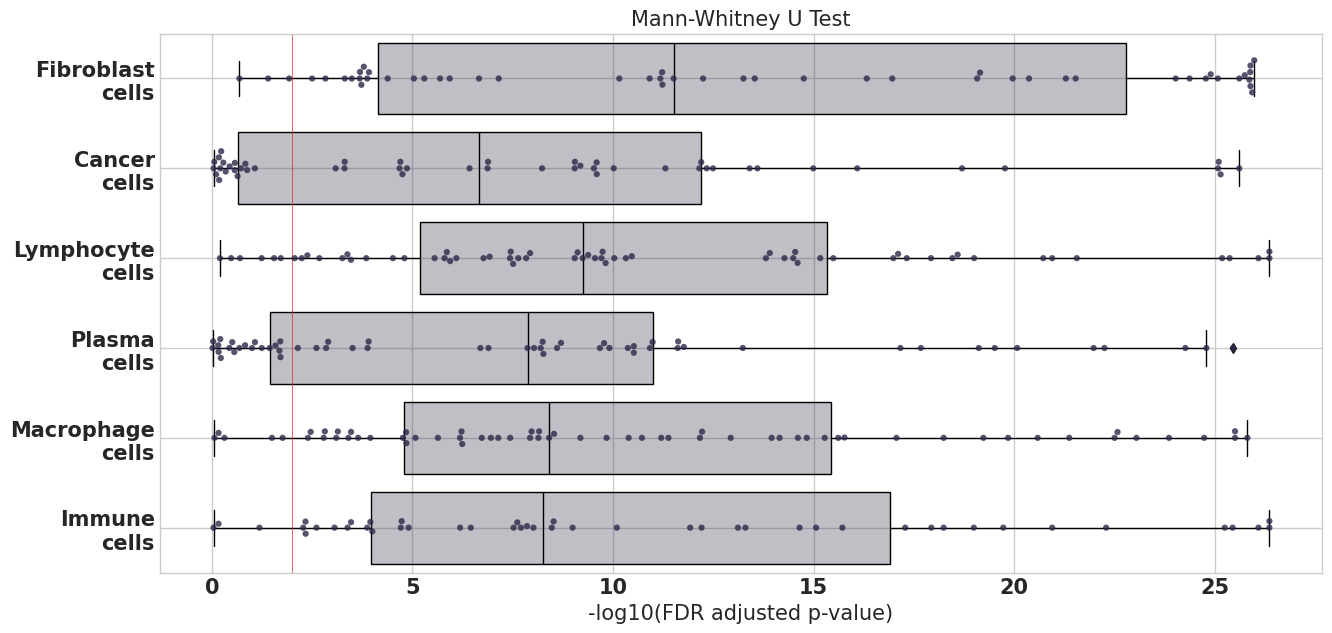

In [100]:
plot_utils.boxplots_pvals_by_group(df_mwh, cell_types, title='Mann-Whitney U Test',  
                                   group_labels=cell_types_labels);

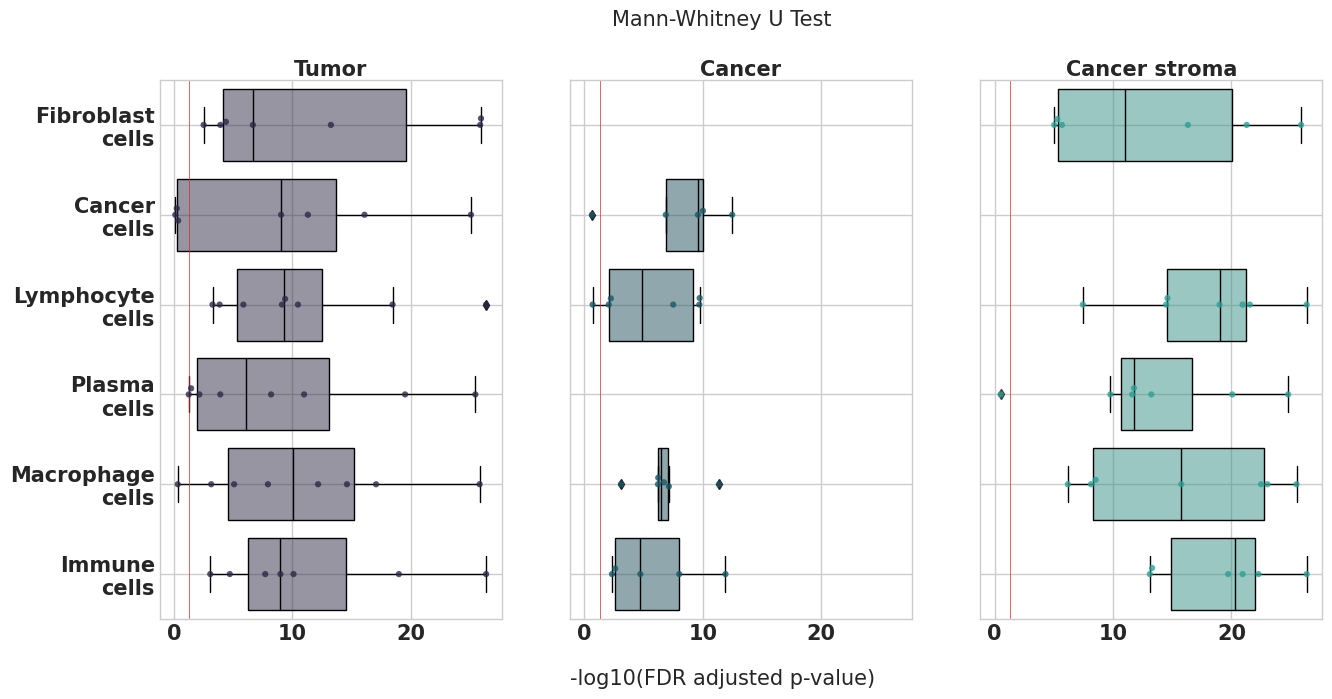

In [101]:
plot_utils.boxplots_pvals_by_groupx_and_groupy(df_mwh, tissue_types, cell_types, 
                                               groupy_labels=cell_types_labels,
                                               groupx_labels=tissue_type_labels,
                                               title='Mann-Whitney U Test');

In [102]:
#df_mwh['tissue'].unique()

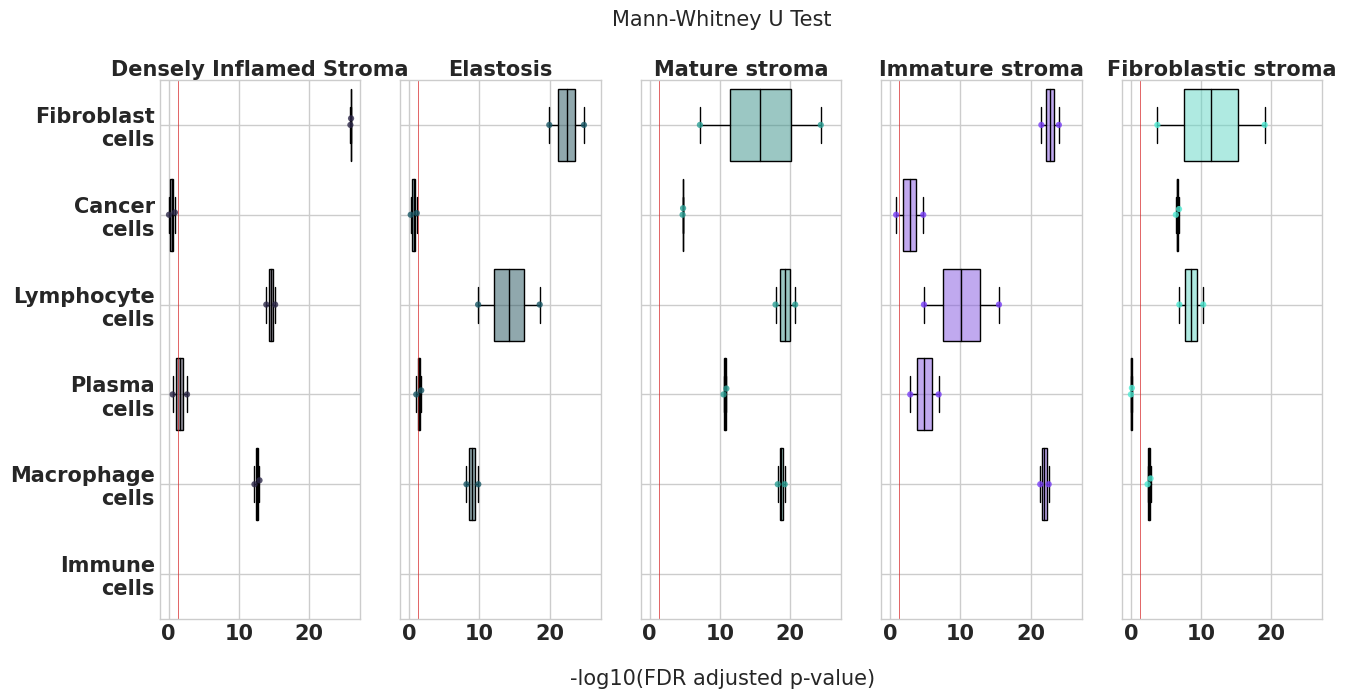

In [103]:
stroma_types = ['DENSELY INFLAMED STROMA', 'ELASTOSIS', 'MATURE STROMA', 'IMMATURE STROMA', 'FIBROBLASTIC STROMA']
stroma_type_labels = ['Densely Inflamed Stroma', 'Elastosis', 'Mature stroma', 'Immature stroma', 'Fibroblastic stroma']

plot_utils.boxplots_pvals_by_groupx_and_groupy(df_mwh, stroma_types, cell_types, 
                                               groupy_labels=cell_types_labels,
                                               groupx_labels=stroma_type_labels,
                                               title='Mann-Whitney U Test');

CANCER STROMA_TGFb-CAF high vs. CANCER STROMA_TGFb-CAF low: ****
CANCER_TGFb-CAF high vs. CANCER_TGFb-CAF low: ****
NECROSIS_TGFb-CAF high vs. NECROSIS_TGFb-CAF low: **


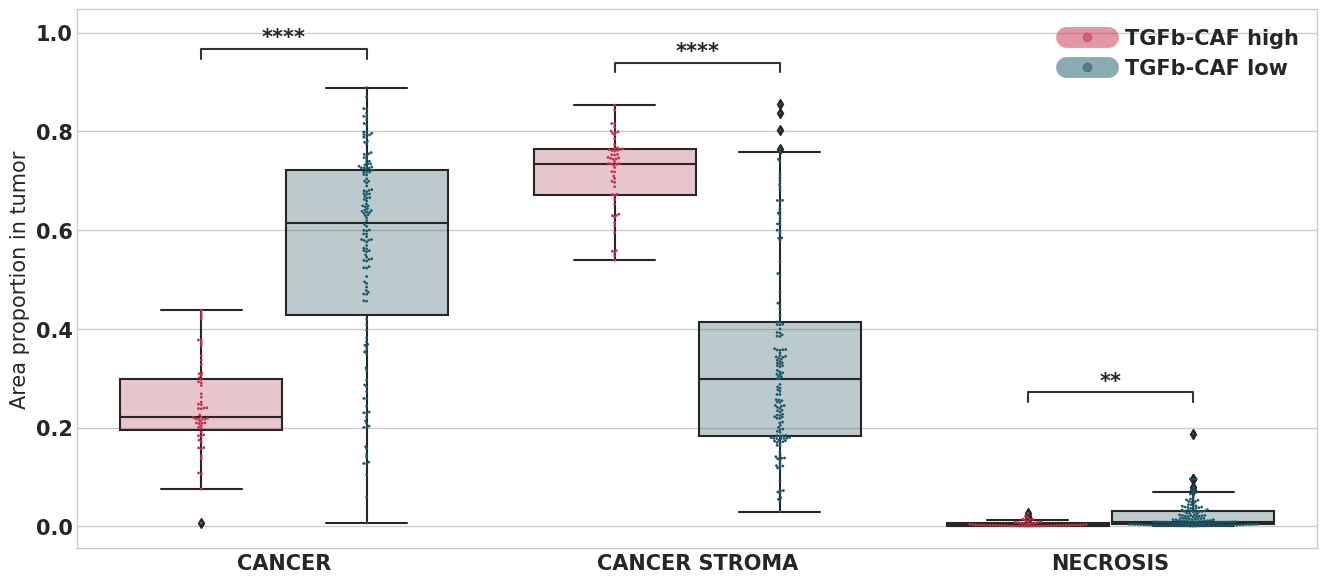

In [104]:
tissue_types = ['CANCER', 'CANCER STROMA', 'NECROSIS']
tissue_type_labels = ['Cancer', 'Cancer stroma', 'Necrosis']

plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^AREA PROP \[\[(CANCER STROMA|CANCER|NECROSIS)\] OVER \[TISSUE\]\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 tissue_types, 
                                  groupx_name='tissue',
                                  groupx_labels=tissue_types_labels, 
                                  ylabel='Area proportion in tumor');

ELASTOSIS_TGFb-CAF high vs. ELASTOSIS_TGFb-CAF low: ***
DENSELY INFLAMED STROMA_TGFb-CAF high vs. DENSELY INFLAMED STROMA_TGFb-CAF low: ***
MATURE STROMA_TGFb-CAF high vs. MATURE STROMA_TGFb-CAF low: **
IMMATURE STROMA_TGFb-CAF high vs. IMMATURE STROMA_TGFb-CAF low: ns
FIBROBLASTIC STROMA_TGFb-CAF high vs. FIBROBLASTIC STROMA_TGFb-CAF low: ****


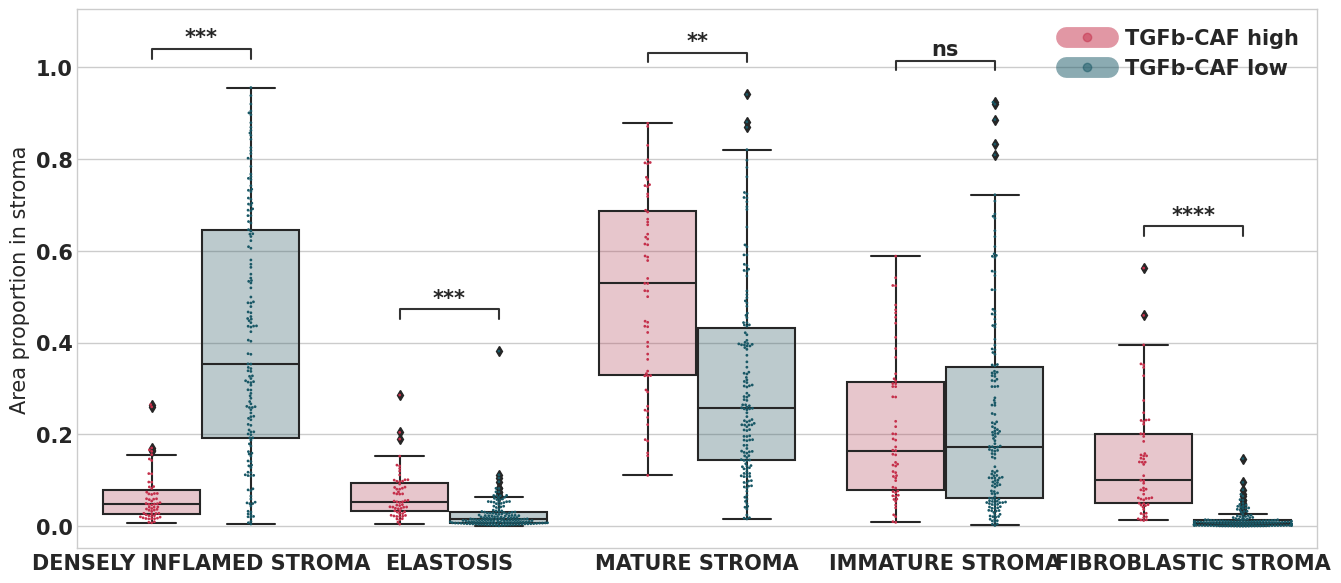

In [105]:
plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^AREA PROP \[\[(DENSELY INFLAMED STROMA|ELASTOSIS|MATURE STROMA|IMMATURE STROMA|FIBROBLASTIC STROMA)\] OVER \[CANCER STROMA\]\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 stroma_types, 
                                 groupx_name='tissue',
                                 groupx_labels=stroma_type_labels, 
                                 ylabel='Area proportion in stroma')
                                 #fname='fig_5b_stromal_subtypes_area_props.svg');

CANCER_TGFb-CAF high vs. CANCER_TGFb-CAF low: ns
FIBROBLAST_TGFb-CAF high vs. FIBROBLAST_TGFb-CAF low: ****
LYMPHOCYTE_TGFb-CAF high vs. LYMPHOCYTE_TGFb-CAF low: ***
PLASMA_TGFb-CAF high vs. PLASMA_TGFb-CAF low: ns
MACROPHAGE_TGFb-CAF high vs. MACROPHAGE_TGFb-CAF low: ***


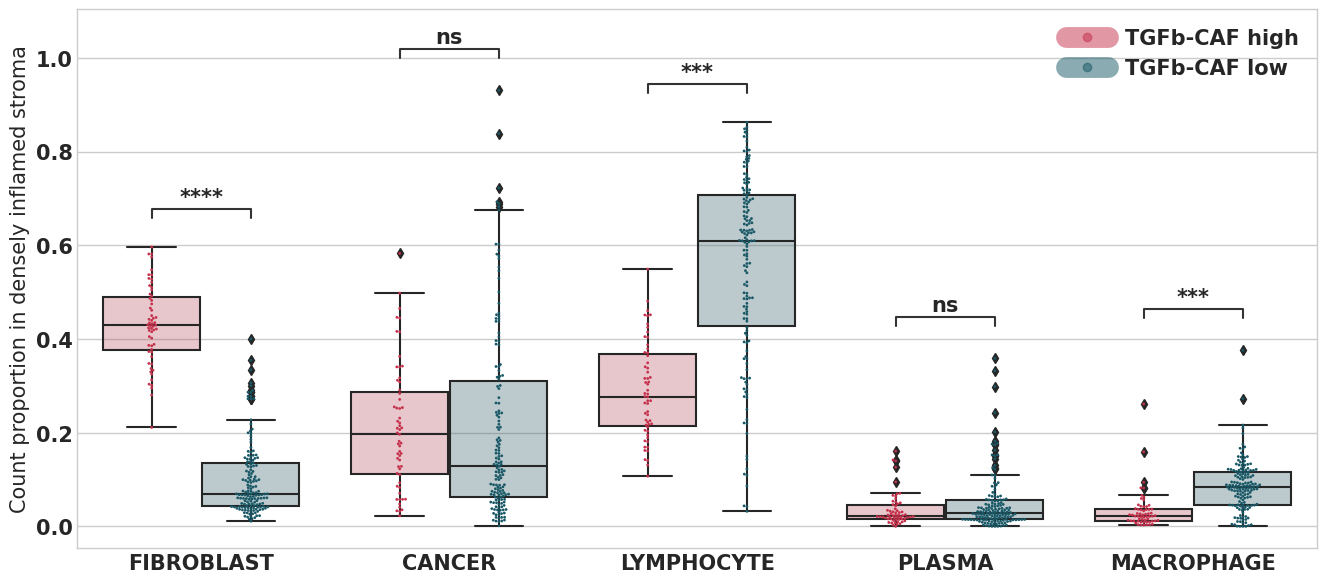

In [106]:
cell_types = ['FIBROBLAST', 'CANCER', 'LYMPHOCYTE',  'PLASMA',
              'MACROPHAGE']
cell_types_labels = ['Fibroblast\ncells', 'Cancer\ncells',  'Lymphocyte\ncells','Plasma\ncells', 
                     'Macrophage\ncells']
plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^COUNT PROP \[\[(CANCER CELLS|FIBROBLAST CELLS|LYMPHOCYTE CELLS|MACROPHAGE CELLS|PLASMA CELLS)\] OVER \[ALL PREDICTED CELLS\]\] IN \[DENSELY INFLAMED STROMA\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 cell_types, 
                                 groupx_labels=cell_types_labels, 
                                 ylabel='Count proportion in densely inflamed stroma')
                                 #fname='fig_5c.svg');

CANCER_TGFb-CAF high vs. CANCER_TGFb-CAF low: ns
FIBROBLAST_TGFb-CAF high vs. FIBROBLAST_TGFb-CAF low: ****
LYMPHOCYTE_TGFb-CAF high vs. LYMPHOCYTE_TGFb-CAF low: ***
PLASMA_TGFb-CAF high vs. PLASMA_TGFb-CAF low: *
MACROPHAGE_TGFb-CAF high vs. MACROPHAGE_TGFb-CAF low: **


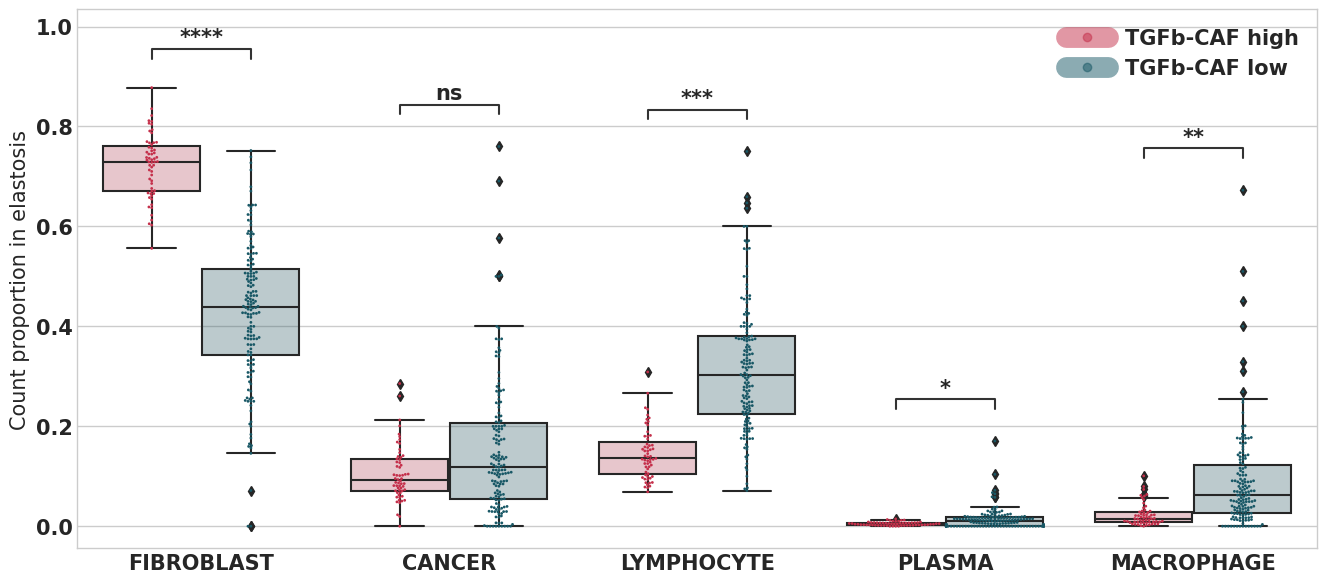

In [107]:
cell_types = ['FIBROBLAST', 'CANCER', 'LYMPHOCYTE',  'PLASMA',
              'MACROPHAGE']
cell_types_labels = ['Fibroblast\ncells', 'Cancer\ncells',  'Lymphocyte\ncells','Plasma\ncells', 
                     'Macrophage\ncells']
plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^COUNT PROP \[\[(CANCER CELLS|FIBROBLAST CELLS|LYMPHOCYTE CELLS|MACROPHAGE CELLS|PLASMA CELLS)\] OVER \[ALL PREDICTED CELLS\]\] IN \[ELASTOSIS\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 cell_types, 
                                 groupx_labels=cell_types_labels, 
                                 ylabel='Count proportion in elastosis')
                                 #fname='fig_5d.svg');

CANCER_TGFb-CAF high vs. CANCER_TGFb-CAF low: *
FIBROBLAST_TGFb-CAF high vs. FIBROBLAST_TGFb-CAF low: ****
LYMPHOCYTE_TGFb-CAF high vs. LYMPHOCYTE_TGFb-CAF low: ****
PLASMA_TGFb-CAF high vs. PLASMA_TGFb-CAF low: ***
MACROPHAGE_TGFb-CAF high vs. MACROPHAGE_TGFb-CAF low: ***


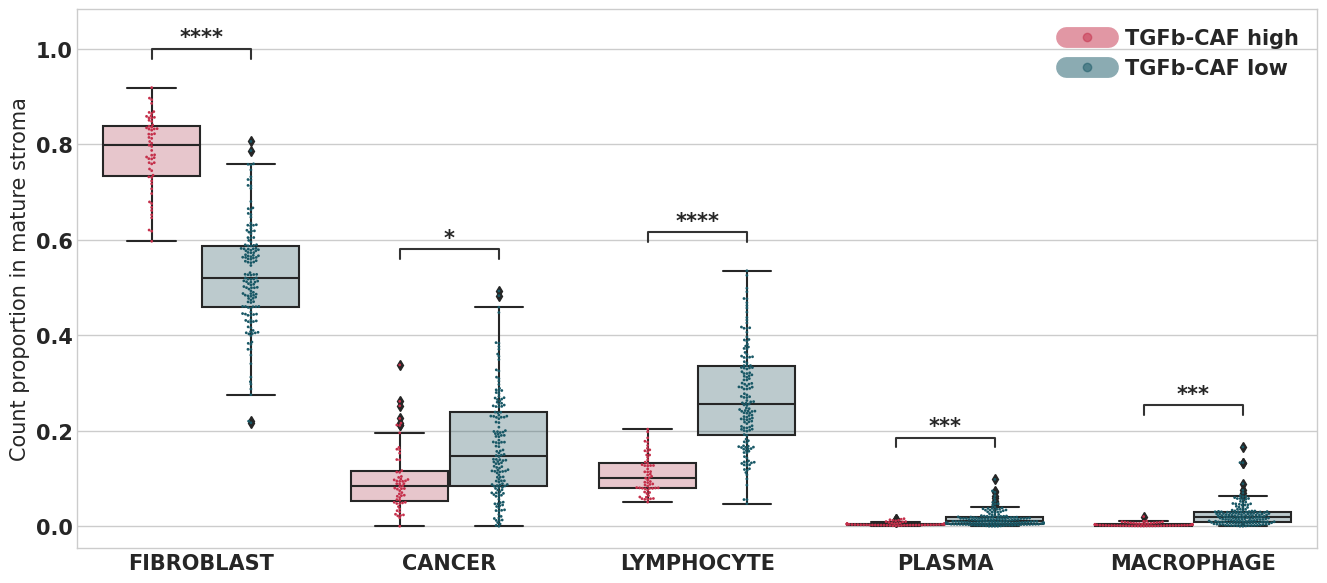

In [108]:
cell_types = ['FIBROBLAST', 'CANCER', 'LYMPHOCYTE',  'PLASMA',
              'MACROPHAGE']
cell_types_labels = ['Fibroblast\ncells', 'Cancer\ncells',  'Lymphocyte\ncells','Plasma\ncells', 
                     'Macrophage\ncells']
plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^COUNT PROP \[\[(CANCER CELLS|FIBROBLAST CELLS|LYMPHOCYTE CELLS|MACROPHAGE CELLS|PLASMA CELLS)\] OVER \[ALL PREDICTED CELLS\]\] IN \[MATURE STROMA\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 cell_types, 
                                 groupx_labels=cell_types_labels, 
                                 ylabel='Count proportion in mature stroma')
                                 #fname='fig_5e.svg');

CANCER_TGFb-CAF high vs. CANCER_TGFb-CAF low: *
FIBROBLAST_TGFb-CAF high vs. FIBROBLAST_TGFb-CAF low: ****
LYMPHOCYTE_TGFb-CAF high vs. LYMPHOCYTE_TGFb-CAF low: ***
PLASMA_TGFb-CAF high vs. PLASMA_TGFb-CAF low: **
MACROPHAGE_TGFb-CAF high vs. MACROPHAGE_TGFb-CAF low: ****


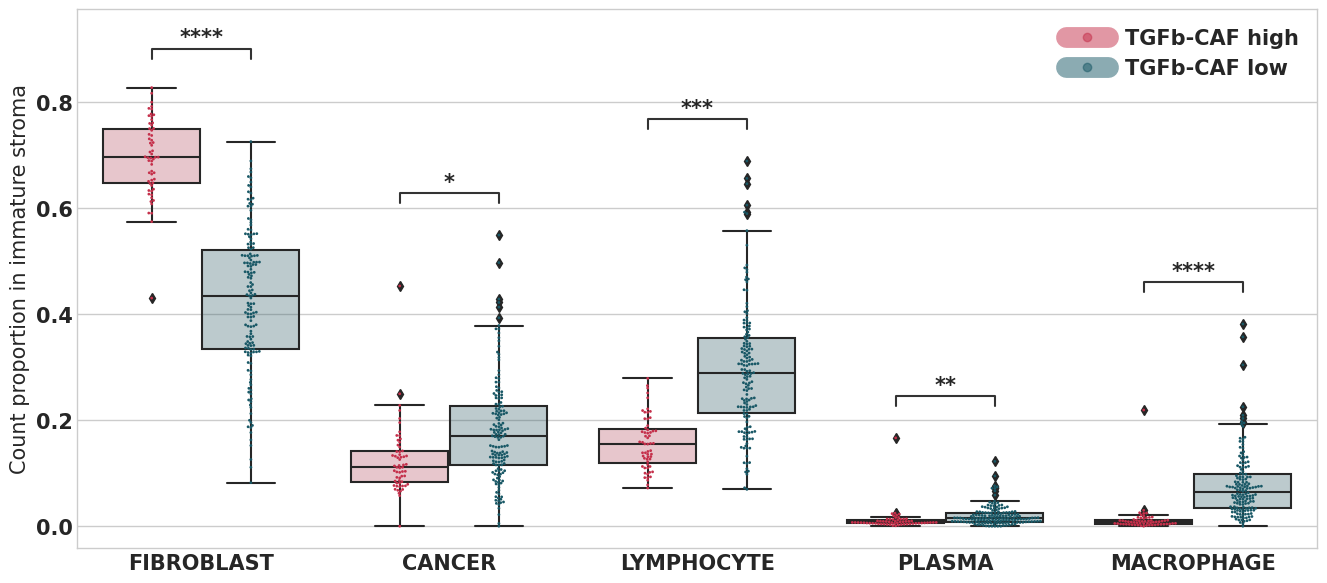

In [109]:
cell_types = ['FIBROBLAST', 'CANCER', 'LYMPHOCYTE',  'PLASMA',
              'MACROPHAGE']
cell_types_labels = ['Fibroblast\ncells', 'Cancer\ncells',  'Lymphocyte\ncells','Plasma\ncells', 
                     'Macrophage\ncells']
plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^COUNT PROP \[\[(CANCER CELLS|FIBROBLAST CELLS|LYMPHOCYTE CELLS|MACROPHAGE CELLS|PLASMA CELLS)\] OVER \[ALL PREDICTED CELLS\]\] IN \[IMMATURE STROMA\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 cell_types, 
                                 groupx_labels=cell_types_labels, 
                                 ylabel='Count proportion in immature stroma')
                                 #fname='fig_5f.svg');

CANCER_TGFb-CAF high vs. CANCER_TGFb-CAF low: **
FIBROBLAST_TGFb-CAF high vs. FIBROBLAST_TGFb-CAF low: **
LYMPHOCYTE_TGFb-CAF high vs. LYMPHOCYTE_TGFb-CAF low: ***
PLASMA_TGFb-CAF high vs. PLASMA_TGFb-CAF low: ns
MACROPHAGE_TGFb-CAF high vs. MACROPHAGE_TGFb-CAF low: *


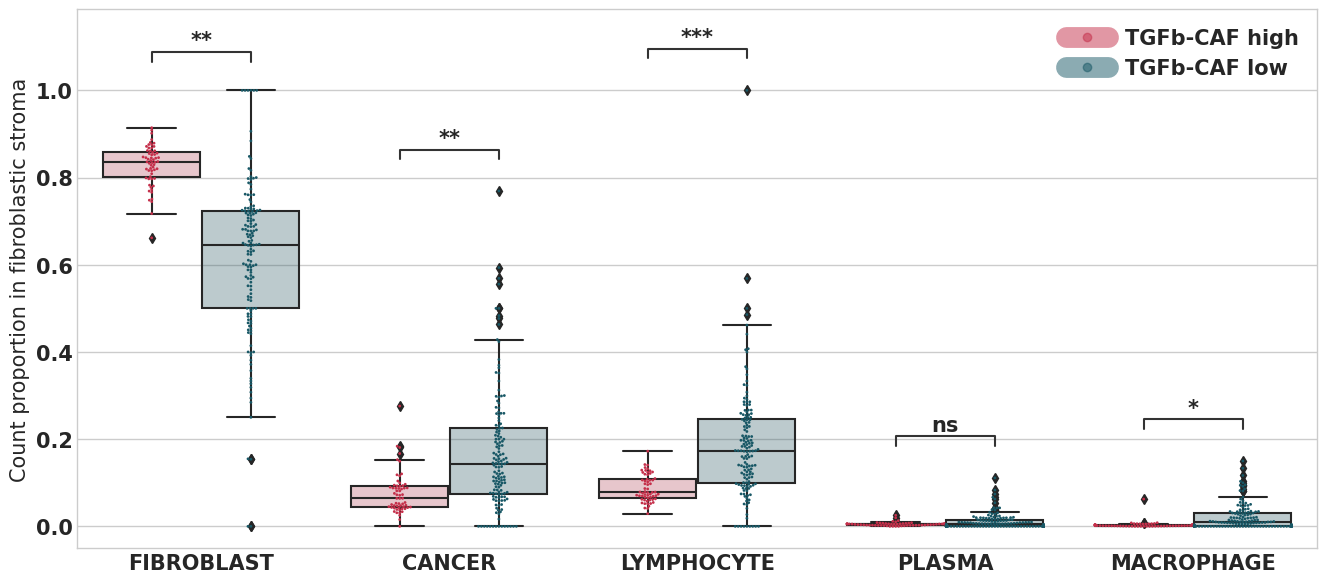

In [110]:
cell_types = ['FIBROBLAST', 'CANCER', 'LYMPHOCYTE',  'PLASMA',
              'MACROPHAGE']
cell_types_labels = ['Fibroblast\ncells', 'Cancer\ncells',  'Lymphocyte\ncells','Plasma\ncells', 
                     'Macrophage\ncells']
plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^COUNT PROP \[\[(CANCER CELLS|FIBROBLAST CELLS|LYMPHOCYTE CELLS|MACROPHAGE CELLS|PLASMA CELLS)\] OVER \[ALL PREDICTED CELLS\]\] IN \[FIBROBLASTIC STROMA\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 cell_types, 
                                 groupx_labels=cell_types_labels, 
                                 ylabel='Count proportion in fibroblastic stroma')
                                 #fname='fig_5g.svg');

LYMPHOCYTE_TGFb-CAF high vs. LYMPHOCYTE_TGFb-CAF low: ****
FIBROBLAST_TGFb-CAF high vs. FIBROBLAST_TGFb-CAF low: ****
PLASMA_TGFb-CAF high vs. PLASMA_TGFb-CAF low: ***
MACROPHAGE_TGFb-CAF high vs. MACROPHAGE_TGFb-CAF low: ****


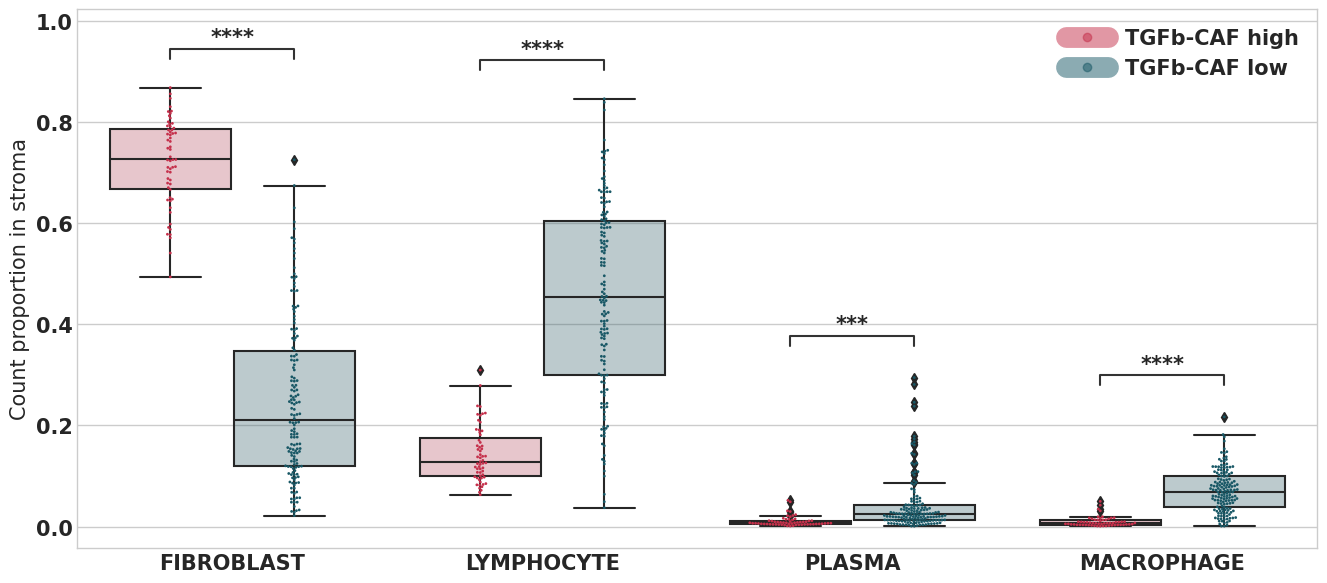

In [111]:
cell_types = ['FIBROBLAST', 'LYMPHOCYTE',  'PLASMA',
              'MACROPHAGE']
cell_types_labels = ['Fibroblast\ncells',  'Lymphocyte\ncells','Plasma\ncells', 
                     'Macrophage\ncells']
plot_utils.boxplots_hifs_by_group(hifs, df_mwh,
                                 '^COUNT PROP \[\[(FIBROBLAST CELLS|LYMPHOCYTE CELLS|MACROPHAGE CELLS|PLASMA CELLS)\] OVER \[ALL PREDICTED CELLS\]\] IN \[CANCER STROMA\]_H & E',
                                 model_prediction, 
                                 colormap_tgfbcaf,
                                 cell_types, 
                                 groupx_labels=cell_types_labels, 
                                 ylabel='Count proportion in stroma');